In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("Train : {}, Test: {}".format(df_train.shape,df_test.shape))

df_train.head()

Train : (550068, 12), Test: (233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
print("NA Values - Train DS")
for col in df_train.columns:
    lna = len(df_train[df_train[col].isna()])
    print("{} : {}".format(col,lna))
print()
print("NA Values - Test DS")
for col in df_test.columns:
    lna = len(df_test[df_test[col].isna()])
    print("{} : {}".format(col,lna))

NA Values - Train DS
User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category_1 : 0
Product_Category_2 : 173638
Product_Category_3 : 383247
Purchase : 0

NA Values - Test DS
User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category_1 : 0
Product_Category_2 : 72344
Product_Category_3 : 162562


In [4]:
print("Unique values count")
for col in ['User_ID','Product_ID','Gender','Age','Occupation','Stay_In_Current_City_Years','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']:
    print("{} : {}".format(col,len(df_train[col].unique())))

Unique values count
User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
Stay_In_Current_City_Years : 5
City_Category : 3
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 18
Product_Category_3 : 16


In [5]:
print("{} : {}".format("Age",df_train.Age.unique()))
new_age = {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}

Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


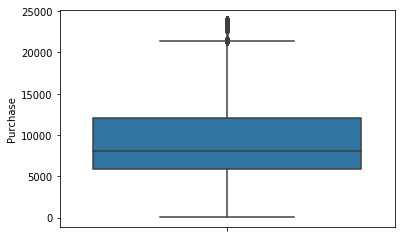

In [6]:
df_Y = pd.DataFrame({"Purchase" : df_train['Purchase']})
df = df_train.drop("Purchase",axis=1)
sns.boxplot(y=df_Y.Purchase)

Top 99.5 percentitle : 21352.0


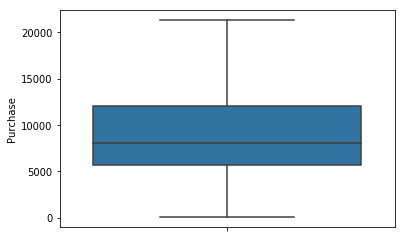

In [7]:
#remove higher outliers
top = np.percentile(df_Y.Purchase,99.5)
print("Top 99.5 percentitle : {}".format(top))
sns.boxplot(y=df_Y[ (df_Y['Purchase']<top) ].Purchase)

In [8]:
df = df[ (df_Y['Purchase']<top) ]
df_Y = df_Y[ (df_Y['Purchase']<top) ].Purchase
print("Train Length : {}, Label Length : {}".format(len(df),len(df_Y)))

Train Length : 547316, Label Length : 547316


In [9]:
df = df.append(df_test,sort=False,ignore_index=True)
df.fillna(0,inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender)

df.Age.replace(new_age,inplace=True)

#city category, ohe
df['Stay_In_Current_City_Years'].replace('4+',4,inplace=True)

df = pd.get_dummies(df,columns=['City_Category'],prefix=["City"])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_A,City_B,City_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,0,0,1


In [10]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
City_A                          uint8
City_B                          uint8
City_C                          uint8
dtype: object

In [11]:
df = df.astype( {'Stay_In_Current_City_Years':int, 
                 'Product_Category_2':int, 
                 'Product_Category_3':int} )
df.describe()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_A,City_B,City_C
count,7.809150e+05,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000,780915.000000
mean,1.003029e+06,0.752812,2.495516,8.077733,1.858298,0.409657,5.347389,6.735453,3.845573,0.268322,0.420854,0.310824
std,1.727086e+03,0.431377,1.352078,6.521447,1.288784,0.491771,3.870552,6.210236,6.250581,0.443087,0.493696,0.462831
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001519e+06,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003075e+06,1.000000,2.000000,7.000000,2.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,1.000000,3.000000,14.000000,3.000000,1.000000,8.000000,14.000000,8.000000,1.000000,1.000000,1.000000
max,1.006040e+06,1.000000,6.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,1.000000,1.000000,1.000000


In [12]:
submission = df_test[["User_ID","Product_ID"]]
#df.drop(["User_ID","Product_ID"],axis=1,inplace=True)
X = df[:547316]
Y = df_Y[:547316]
X_test = df[547316:]
Y_test = df_Y[547316:]

In [13]:
uids_train = set(X.User_ID)
pids_train = set(X.Product_ID)
uids_test = set(X_test.User_ID)
pids_test = set(X_test.Product_ID)
print("uids diff : {}, pid diff : {}".format(len(uids_test-uids_train), len(pids_test-pids_train)))

uids diff : 0, pid diff : 46


In [14]:
le.fit(X.User_ID)
X["User_ID"] = le.transform(X["User_ID"])
X_test["User_ID"] = le.transform(X_test["User_ID"])

/home/aditya/.conda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aditya/.conda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
from scipy import stats

le.fit(X.Product_ID)
X["Product_ID"] = le.transform(X["Product_ID"])

X_test.loc[ X_test[~X_test.Product_ID.isin(pids_test-pids_train)].index, "Product_ID" ] = le.transform(X_test.loc[ X_test[~X_test.Product_ID.isin(pids_test-pids_train)].index, "Product_ID" ])
#X_test.loc[ X_test[X_test.Product_ID.isin(pids_test-pids_train)].index, "Product_ID" ] = stats.mode(X.Product_ID).mode[0]
X_test.loc[ X_test[X_test.Product_ID.isin(pids_test-pids_train)].index, "Product_ID" ] = -1

X.head()

/home/aditya/.conda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/aditya/.conda/envs/py3k/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_A,City_B,City_C
0,0,672,0,0,10,2,0,3,0,0,1,0,0
1,0,2376,0,0,10,2,0,1,6,14,1,0,0
2,0,852,0,0,10,2,0,12,0,0,1,0,0
3,0,828,0,0,10,2,0,12,14,0,1,0,0
4,1,2734,1,6,16,4,0,8,0,0,0,0,1


In [16]:
X_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_A,City_B,City_C
547316,3,1196,1,4,7,2,1,1,11,0,0,1,0
547317,8,1043,1,2,17,0,0,3,5,0,0,0,1
547318,9,2764,0,3,1,4,1,5,14,0,0,1,0
547319,9,1358,0,3,1,4,1,4,9,0,0,1,0
547320,10,529,0,2,1,1,0,4,5,12,0,0,1


In [17]:
from sklearn.metrics import mean_squared_error

def rmse(model,X,Y):
    y_ = model.predict(X)
    return mean_squared_error(y_,Y)**0.5

In [18]:
from xgboost import XGBRegressor
from hyperopt import hp,fmin,tpe
from sklearn.model_selection import cross_val_score, KFold

def objective(params):
    params = {
        'n_estimators' : int(params['n_estimators']),
        'max_depth' : int(params['max_depth']),
        'learning_rate' : float(params['learning_rate'])
    }
    
    clf = XGBRegressor(**params,n_jobs=4)
    score = cross_val_score(clf, X, Y, scoring = rmse, cv=KFold(n_splits=3)).mean()
    print("Parmas {} - {}".format(params,score))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 50),
    'max_depth': hp.quniform('max_depth', 4, 16, 4),
    'learning_rate' : hp.uniform('learning_rate',0.05, 0.15) 
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

Parmas {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.1235403705535484} - 2581.346233790253
Parmas {'n_estimators': 600, 'max_depth': 12, 'learning_rate': 0.07893589695925332} - 2522.2296509247367
Parmas {'n_estimators': 450, 'max_depth': 16, 'learning_rate': 0.138517213976113} - 2622.3812555000263
Parmas {'n_estimators': 350, 'max_depth': 12, 'learning_rate': 0.055189724710141996} - 2522.8060401295425
Parmas {'n_estimators': 400, 'max_depth': 16, 'learning_rate': 0.08559340972858318} - 2586.1469006958228
Parmas {'n_estimators': 350, 'max_depth': 12, 'learning_rate': 0.12009094934137725} - 2524.6006876452643
Parmas {'n_estimators': 350, 'max_depth': 12, 'learning_rate': 0.0672283839159093} - 2516.774880074861
Parmas {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.10143715966055954} - 2521.363383238355
Parmas {'n_estimators': 300, 'max_depth': 16, 'learning_rate': 0.05152208138669678} - 2562.4805016204186
Parmas {'n_estimators': 700, 'max_depth': 8, 'learning_rate': 

In [19]:
## XGBoost
xgb = XGBRegressor(n_estimators=int(best['n_estimators']),
                   max_depth=int(best['max_depth']),
                   learning_rate=best['learning_rate'],
                   n_jobs=4,
                   verbose=1)
xgb.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0672283839159093,
       max_delta_step=0, max_depth=12, min_child_weight=1, missing=None,
       n_estimators=350, n_jobs=4, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=1)

In [20]:
Y_test = xgb.predict(X_test)
Y_test[:10]

array([ 14506.95507812,   9977.17285156,   7848.45751953,   3093.50024414,
         2598.16210938,  10400.16015625,  12169.4375    ,   8857.93652344,
        12944.88378906,   5672.67578125], dtype=float32)

In [21]:
ans = pd.DataFrame({
    "User_ID":submission.User_ID,
    "Product_ID":submission.Product_ID,
    "Purchase":Y_test.reshape((len(Y_test)))
})
ans.to_csv("submission10.csv",index=False)